In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, datasets, metrics
from sklearn.metrics import auc, roc_auc_score, roc_curve, confusion_matrix, f1_score, precision_recall_curve, precision_score, recall_score, accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt

#### 여기는 외부 데이터셋으로 평가하는 데이터들

In [2]:
import os
os.getcwd()

'/data/home/ldhyun7222/hERGAT/another method'

In [3]:
os.chdir('/data/home/ldhyun7222/hERGAT')
#test_df= pd.read_csv('./dataset/external dataset/hERGSPred_dataset_with_canonical_smiles.csv')
#test_df= pd.read_csv('./dataset/external dataset/deep_learning_dataset_with_canonical_smiles.csv')
test_df= pd.read_csv('./dataset/external dataset/CardioTox_dataset_with_canonical_smiles.csv')

In [4]:
train_df= pd.read_csv('./another method/train_df2.csv')
test_df= pd.read_csv('./another method/test_df2.csv')

X_train = train_df.drop(columns = ['Class', 'SMILES', 'cano_smiles'])
y_train = train_df['Class']

In [5]:
X_test = test_df.drop(columns = ['Class', 'SMILES', 'cano_smiles'])
y_test = test_df['Class']

In [6]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8314, 1029)
(8314,)
(924, 1029)
(924,)


### Grid search로 조합 찾아보기

In [7]:
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.neighbors import KNeighborsClassifier
# import numpy as np

# # 모델 및 파라미터 설정
# knn = KNeighborsClassifier()
# parameters = {
#     'n_neighbors': [3, 5, 7, 9, 11],
#     'weights': ['uniform', 'distance'],
#     'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
# knn_search = RandomizedSearchCV(knn, parameters, n_iter=30, cv=10, refit=True, return_train_score=True)

# # 모델 학습
# knn_search.fit(X_train, y_train)

# # 최적 파라미터 출력
# print("Best Parameters:", knn_search.best_params_)

# # 가장 낮은 성능의 하이퍼파라미터 조합 찾기
# min_index = np.argmin(knn_search.cv_results_['mean_test_score'])
# worst_params = knn_search.cv_results_['params'][min_index]
# print("Worst Parameters:", worst_params)


#n_estimators=50,max_features=24, max_depth=190

knn = KNeighborsClassifier()
parameters = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
knn = RandomizedSearchCV(knn, parameters, n_iter=30, cv=10, refit=True, return_train_score=True)
knn.fit(X=X_train, y=y_train)
print(knn.best_params_)

{'weights': 'distance', 'n_neighbors': 3, 'algorithm': 'kd_tree'}


In [8]:
# 최적의 파라미터를 적용하기
model = KNeighborsClassifier(n_neighbors = 3, weights = 'distance', algorithm = 'ball_tree')

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:,1]


pred_train = model.predict(X_train)


train_score = accuracy_score(y_train,pred_train)
Precision = precision_score(y_test, y_pred)
Recall = recall_score(y_test, y_pred)
F1_score = 2*(Precision*Recall)/(Precision+Recall)

precisions, recalls, _ = precision_recall_curve(y_test, y_pred_proba)
AUPR = auc(recalls, precisions)

print('accuracy : {0}'.format(accuracy_score(y_test, y_pred)))
print('Precision : {0}'.format(Precision))
print('Recall : {0}'.format(Recall))
print('ROC_score :', roc_auc_score(y_test, y_pred_proba))
print('AUPRC : {0}'.format(AUPR))
print("F1 score : {0}".format(F1_score))

accuracy : 0.7997835497835498
Precision : 0.8362068965517241
Recall : 0.8434782608695652
ROC_score : 0.854246916656285
AUPRC : 0.9133095822128795
F1 score : 0.8398268398268398


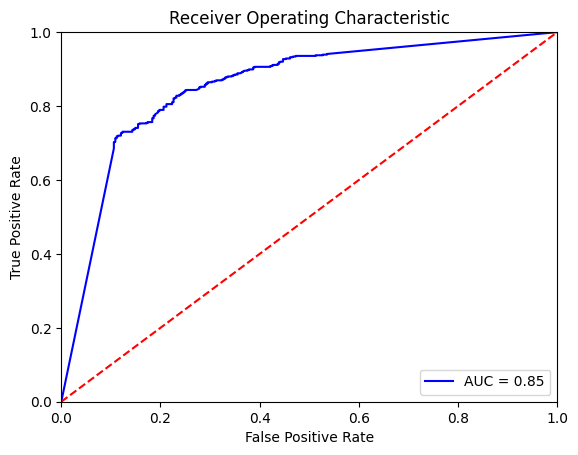

In [9]:
# ROC curve
from sklearn.metrics import roc_auc_score,roc_curve,auc

knn_fpr, knn_tpr, threshold = roc_curve(y_test, y_pred_proba)
knn_roc_auc = auc(knn_fpr, knn_tpr)

knn_roc = pd.DataFrame({
    'FPR': knn_fpr,
    'TPRate': knn_tpr,
    'Threshold': threshold
})

plt.title('Receiver Operating Characteristic')
plt.plot(knn_fpr, knn_tpr, 'b', label = 'AUC = %0.2f' % knn_roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

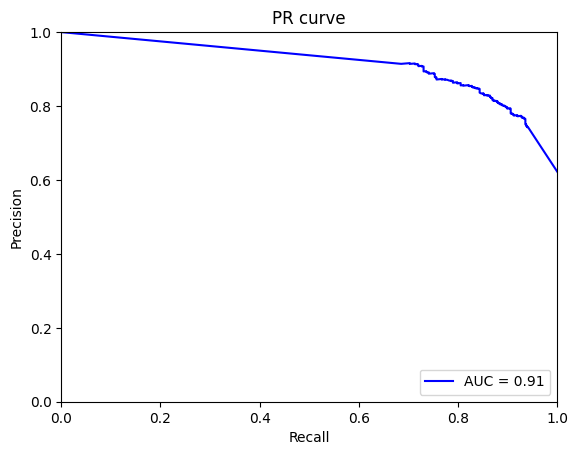

In [10]:
# precision, recall, threshold 
knn_precision, knn_recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
# pr_auc
knn_pr_auc = auc(knn_recall, knn_precision)

plt.title('PR curve')
plt.plot(knn_recall, knn_precision, 'b', label = 'AUC = %0.2f' % knn_pr_auc)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

# stratified 10-cross validation

In [1]:
X = pd.concat([X_train, X_test], axis = 0)
y = pd.concat([y_train, y_test], axis = 0)

X = X.reset_index()
X = X.drop(columns = 'index')
y = y.reset_index()
y = y.drop(columns = 'index')
y = y['Class']


NameError: name 'pd' is not defined

In [12]:
from sklearn.model_selection import StratifiedKFold


skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=90)

# 평가 지표를 저장할 리스트
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
aupr_scores = []
roc_auc_scores = []

# Cross-Validation 수행
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = KNeighborsClassifier(n_neighbors = 3, weights = 'distance', algorithm = 'ball_tree')
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # 평가 지표 계산
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(2 * (precision_scores[-1] * recall_scores[-1]) / (precision_scores[-1] + recall_scores[-1]))
    roc_auc_scores.append(roc_auc_score(y_test, y_pred_proba))
    
    precisions, recalls, _ = precision_recall_curve(y_test, y_pred_proba)
    aupr_scores.append(auc(recalls, precisions))

# 평균 평가 지표 출력
print("Average Accuracy:", np.mean(accuracy_scores))
print("Average Precision:", np.mean(precision_scores))
print("Average Recall:", np.mean(recall_scores))
print("Average F1-Score:", np.mean(f1_scores))
print("Average AUPR:", np.mean(aupr_scores))
print("Average ROC AUC:", np.mean(roc_auc_scores))

Average Accuracy: 0.8020098446154783
Average Precision: 0.845350629056583
Average Recall: 0.8392867493538219
Average F1-Score: 0.8422044473521126
Average AUPR: 0.9174172228411293
Average ROC AUC: 0.8560313371063426


In [13]:
print('knn 성능평가지표 = 확장된 데이터셋')

knn 성능평가지표 = 확장된 데이터셋


## strarified 10-cross validation의 AUROC 그리기

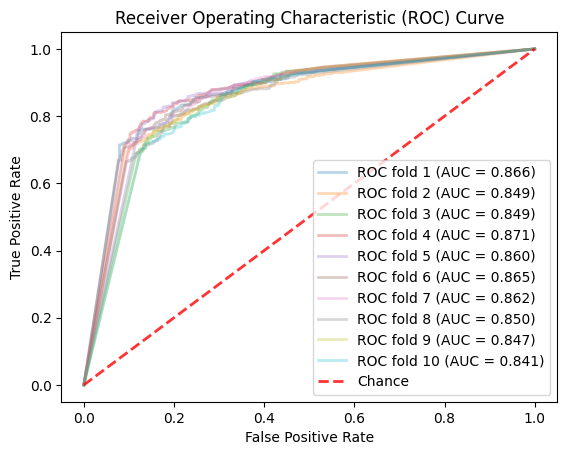

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# ROC Curve를 그리기 위한 준비
tpr_list = []
fpr_list = []
roc_auc_list = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = KNeighborsClassifier(n_neighbors = 3, weights = 'distance', algorithm = 'ball_tree')
    model.fit(X_train, y_train)
    
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    tpr_list.append(tpr)
    fpr_list.append(fpr)
    roc_auc_list.append(roc_auc)

# ROC Curve 그리기
plt.figure()
for i in range(len(tpr_list)):
    plt.plot(fpr_list[i], tpr_list[i], lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.3f)' % (i+1, roc_auc_list[i]))

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig('Stratified KNN_AUROC.png')
plt.show()

평균값으로 cross validation 그래프 그리기

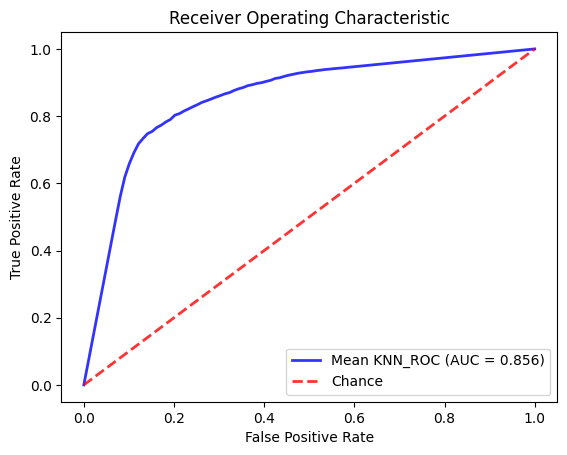

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 평균 FPR, TPR 및 AUC 계산을 위한 준비
mean_fpr = np.linspace(0, 1, 100)
tpr_list = []
auc_list = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = KNeighborsClassifier(n_neighbors = 3, weights = 'distance', algorithm = 'ball_tree')
    model.fit(X_train, y_train)
    
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    tpr_list.append(np.interp(mean_fpr, fpr, tpr))  # 각 fold의 TPR을 평균 FPR에 대해 보간
    tpr_list[-1][0] = 0.0
    auc_list.append(auc(fpr, tpr))

# 평균 TPR 및 평균 AUC 계산
mean_tpr = np.mean(tpr_list, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)

# 평균 ROC Curve 그리기
plt.figure()
plt.plot(mean_fpr, mean_tpr, color='b', label=r'Mean KNN_ROC (AUC = %0.3f)' % mean_auc, lw=2, alpha=.8)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## 평균값으로 stratified 10-cross validation roc curve 그리기

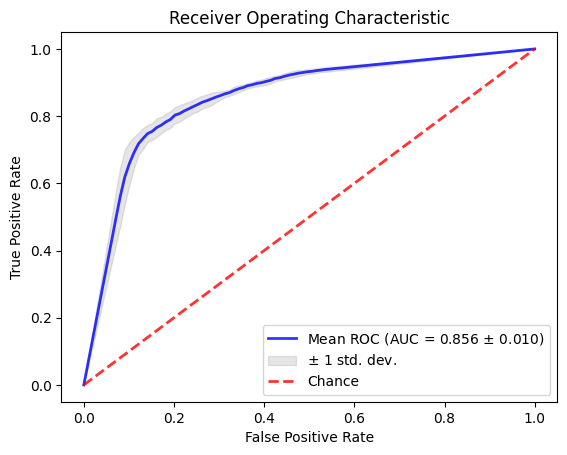

In [16]:
std_auc = np.std(auc_list)
std_tpr = np.std(tpr_list, axis = 0)

#평균을 기준으로 위아래로 표준편차 만큼의 tpr 구간을 계산
tprs_upper= np.minimum(mean_tpr + std_tpr , 1)
tprs_lower= np.maximum(mean_tpr - std_tpr , 0)

# 평균 roc와 오차 막대 그리프 그리기
plt.figure()
plt.plot(mean_fpr, mean_tpr, color='b', label=r'Mean ROC (AUC = %0.3f $\pm$ %0.3f)' % (mean_auc, std_auc), lw=2, alpha=.8)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## strarified 10-cross validation의 AUPR 그리기

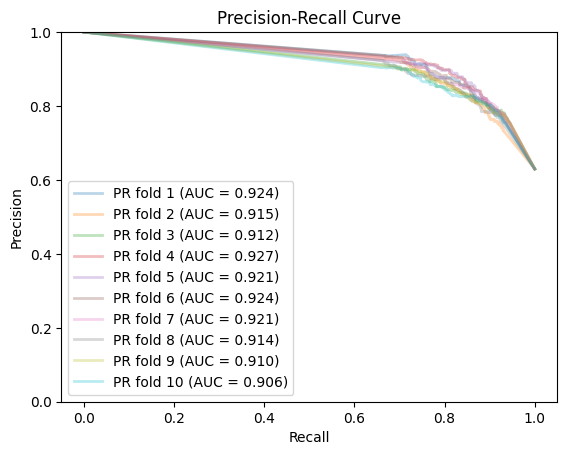

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

# PR Curve를 그리기 위한 준비
precision_list = []
recall_list = []
pr_auc_list = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = KNeighborsClassifier(n_neighbors = 3, weights = 'distance', algorithm = 'ball_tree')
    model.fit(X_train, y_train)
    
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = auc(recall, precision)

    precision_list.append(precision)
    recall_list.append(recall)
    pr_auc_list.append(pr_auc)

# Precision-Recall Curve 그리기
plt.figure()
for i in range(len(precision_list)):
    plt.plot(recall_list[i], precision_list[i], lw=2, alpha=0.3, label='PR fold %d (AUC = %0.3f)' % (i+1, pr_auc_list[i]))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.ylim([0.0, 1.0])  # Set the start of y-axis to 0
plt.savefig('Stratified KNN_AUPR.png')
plt.show()


평균값으로 AUPR cross validation 그래프 그리기

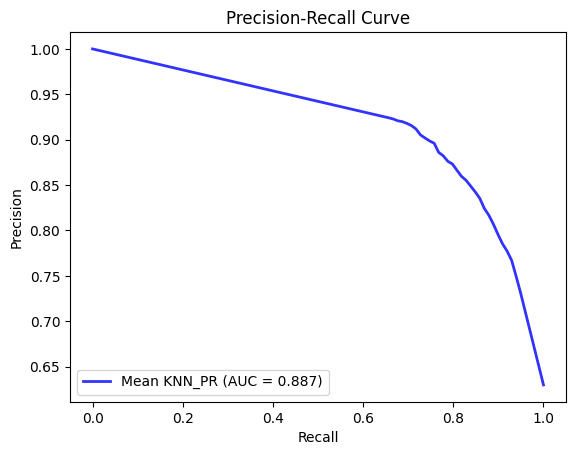

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

# 평균 Precision 및 Recall 계산을 위한 준비
mean_recall = np.linspace(0, 1, 100)
precision_list = []
pr_auc_list = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = KNeighborsClassifier(n_neighbors = 3, weights = 'distance', algorithm = 'ball_tree')
    model.fit(X_train, y_train)
    
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    precision_list.append(np.interp(mean_recall, recall[::-1], precision[::-1]))  # 각 fold의 Precision을 평균 Recall에 대해 보간
    pr_auc_list.append(auc(recall, precision))

# 평균 Precision 계산
mean_precision = np.mean(precision_list, axis=0)

# 평균 PR Curve 그리기
plt.figure()
plt.plot(mean_recall, mean_precision, color='b', label=r'Mean KNN_PR (AUC = %0.3f)' % np.mean(pr_auc_list), lw=2, alpha=.8)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


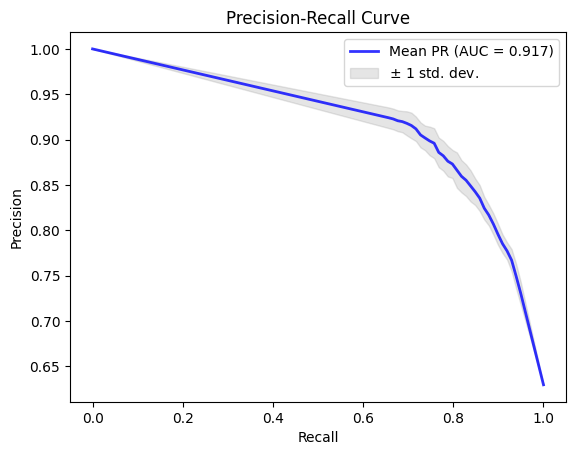

In [27]:
# Precision의 표준편차 계산
std_precision = np.std(precision_list, axis=0)

# 평균 위아래로 표준편차 만큼의 Precision 구간을 계산 (오차 막대)
precision_upper = np.minimum(mean_precision + std_precision, 1)
precision_lower = np.maximum(mean_precision - std_precision, 0)

# 평균 PR Curve와 오차 막대 그리기
plt.figure()
plt.plot(mean_recall, mean_precision, color='b', label=r'Mean PR (AUC = %0.3f)' % np.mean(pr_auc_list), lw=2, alpha=.8)
plt.fill_between(mean_recall, precision_lower, precision_upper, color='grey', alpha=.2, label=r'$\pm$ 1 std. dev.')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="best")
plt.show()


In [28]:
np.savetxt('cross validation figure/Stratified 10-cross validation/knn_mean_fpr.csv', mean_fpr, delimiter=',')
np.savetxt('cross validation figure/Stratified 10-cross validation/knn_mean_tpr.csv', mean_tpr, delimiter=',')
np.savetxt('cross validation figure/Stratified 10-cross validation/knn_mean_precision.csv', mean_precision, delimiter=',')
np.savetxt('cross validation figure/Stratified 10-cross validation/knn_mean_recall.csv', mean_recall, delimiter=',')



np.savetxt('cross validation figure/Stratified 10-cross validation/knn_std_tpr.csv', std_tpr, delimiter=',')
np.savetxt('cross validation figure/Stratified 10-cross validation/knn_std_precision.csv', std_precision, delimiter=',')
np.savetxt('cross validation figure/Stratified 10-cross validation/knn_pr_auc_list.csv', pr_auc_list, delimiter=',')

In [3]:
import os
os.getcwd()

'/data/home/ldhyun7222/hERGAT/another method'